# Extracting the config from Blackmatter ESXi ELF Encryptors
Sample: `f864922f947a6bb7d894245b53795b54b9378c0f7633c521240488e86f60c2c5`

[MalwareBazaar Database](https://bazaar.abuse.ch/sample/f864922f947a6bb7d894245b53795b54b9378c0f7633c521240488e86f60c2c5)

Requirements:
- pip install pyelftools

## Examining our ELF file

In [124]:
from __future__ import print_function
import sys

# If pyelftools is not installed, the example can also run from the root or
# examples/ dir of the source distribution.
sys.path[0:0] = ['.', '..']

from elftools.elf.elffile import ELFFile


def process_file(filename):
    print('Sections in ELF file:', filename)
    with open(filename, 'rb') as f:
        elffile = ELFFile(f)

        for section in elffile.iter_sections():
                print('  ' + section.name)



process_file("tmp/blackmatter_elf.inactive")

Sections in ELF file: tmp/blackmatter_elf.inactive
  
  .interp
  .note.ABI-tag
  .note.gnu.build-id
  .gnu.hash
  .dynsym
  .dynstr
  .gnu.version
  .gnu.version_r
  .rela.dyn
  .rela.plt
  .init
  .plt
  .text
  .fini
  .rodata
  .app.version
  .cfgETD
  .eh_frame_hdr
  .eh_frame
  .gcc_except_table
  .tbss
  .init_array
  .fini_array
  .jcr
  .data.rel.ro
  .dynamic
  .got
  .data
  nocommon
  .bss
  .comment
  .shstrtab


_We can see that our ELF payload has a section named .cfgETD
This is where the config data resides in current BlackMatter ELF payloads_

In [125]:
#we make a small function to grab the config section by name
def get_config_section_data(filename):
    with open(filename, 'rb') as f:
        elffile = ELFFile(f)

        for section in elffile.iter_sections():
            if section.name.startswith('.cfgETD'):
                return section.data()

config_data = get_config_section_data("tmp/blackmatter_elf.inactive")

In [126]:
#decoding our section data into a utf-8 string gives us a base64 string
config_string = config_data.decode("utf-8") #we do not add the 'validate=True' parameter
print(config_string) #if this does not print out a clear base64 string, something has gone wrong

eNqNVulf2moT/YWQhBiWBEgIJARI2PfNACIoshZBUQigoiJlcUOtuLXW9l+/oKWv9356P5/M
nDkzz8zJdLxVKmw9dEbbk/LZ5V0jdn75+LgdeRgNZ/lh/TpFXQ/Gw0HbQXmLb7lKxvjDJ0Ti
0EynJhm3akXaObaDBkC+SnkVTuueb4F74lnFnc7qwJ7XkWx9tRGe6rgje9NQ8cbS5tTbgdac
c5SS4tDnU2Vl0iY41q18C7gMvM+uDivdmWHbm3KWoH15ajthazqvM22os8Z+m9km7dfaNX8M
0RdeOFT3P2SC2rw/A7qrh36BDyGEKThDBcVGmS4Dug3utU/s642iIYu29SE9GQPznO1No+ue
rClZy36O+jVJKf0Z49AdV39xEOpnMUE5AzbCKhdPG9nXniWeeXklfJFcmHe0LlPRGQcllOO9
WTCrN64khlqrFtRJeQWyadc7j2dphLtIaOsuCdGQKxh41nJpiA1ZqagUVl99rLo3ZUTBC3NH
ZsQTuRadIlMFoU32h2Tj/Um1TaB/p+02PRQExh048YuMFpkR6MpuBX9nEmpBnZV77xw2ImzV
OW8yWjlv7TlR6Nx3xBncT+bG/va9NkRPT6Rn7ZtoD7I/bAFSe8RuRbRRIA2JO71IwGy8Fo7l
zS3Rf2/dyO7Jgt6geJp4ZUyRlLGZMqBx2PHCnDAdDyrYBKzq55+ofbtNwrt1wMBRAdiuRWxe
7XqUCIBpBjAE0+eST6ZkTZioZTpka4+OuRI+VZLb0kEUvv7T6jVTrYxe2FsxpuMbv7RhbXrN
/KJoGvlXjecx44y8UHC8GzEd2y6jNuSn3Cw1tmahX2T/VKtkY+6SEP+Nq9LHPHUQ1LJI6Du0
0/JQWAhp+3mD3wmkw2Fin+vaRMWpxph29fNrck3Cyimhh3XCw/qDBVPL2PCA1oow8aXWQvyJ
MdJ0krs+5OuG6KZWfEkVTMQAyM04JnkPvXkvN+2s2jHEzQEOIc4

## Base64 Decoding

In [127]:
import base64

In [128]:
config_b64_decoded = base64.b64decode(config_string) #now we decode our base64 string into a bytearray
print(config_b64_decoded)

b'x\xda\x8dV\xe9_\xdaj\x13\xfd\x85\x90\x84\x18\x96\x04H\x08$\x04H\xd8\xf7\xcd\x00"(\xb2\x16AQ\x08\xa0\xa2"eqC\xad\xb8\xb5\xd6\xf6_\xbf\xa0\xa5\xaf\xf7~z?\x9f\xcc\x9c93\xcf\xcc\xc9t\xbcU*l=tF\xdb\x93\xf2\xd9\xe5]#v~\xf9\xf8\xb8\x1dy\x18\rg\xf9a\xfd:E]\x0f\xc6\xc3A\xdbAy\x8bo\xb9J\xc6\xf8\xc3\'D\xe2\xd0L\xa7&\x19\xb7jE\xda9\xb6\x83\x06@\xbeJy\x15N\xeb\x9eo\x81{\xe2Y\xc5\x9d\xce\xea\xc0\x9e\xd7\x91l}\xb5\x11\x9e\xea\xb8#{\xd3P\xf1\xc6\xd2\xe6\xd4\xdb\x81\xd6\x9cs\x94\x92\xe2\xd0\xe7See\xd2&8\xd6\xad|\x0b\xb8\x0c\xbc\xcf\xae\x0e+\xdd\x99a\xdb\x9br\x96\xa0}yj;ak:\xaf3m\xa8\xb3\xc6~\x9b\xd9&\xed\xd7\xda5\x7f\x0c\xd1\x17^8T\xf7?d\x82\xda\xbc?\x03\xba\xab\x87~\x81\x0f!\x84)8C\x05\xc5F\x99.\x03\xba\r\xee\xb5O\xec\xeb\x8d\xa2!\x8b\xb6\xf5!=\x19\x03\xf3\x9c\xedM\xa3\xeb\x9e\xac)Y\xcb~\x8e\xfa5I)\xfd\x19\xe3\xd0\x1dW\x7fq\x10\xeag1A9\x036\xc2*\x17O\x1b\xd9\xd7\x9e%\x9eyy%|\x91\\\x98w\xb4.S\xd1\x19\x07%\x94\xe3\xbdY0\xab7\xae$\x86Z\xab\x16\xd4Iy\x05\xb2i\xd7;\x8fgi\x84\xbbHh\xeb.\t\xd1\x90+\x18x\xd

## Zlib decompression

Throwing our bytearray into cyberchef, any kind of 'magic' tool, will tell us that our data is compressed by zlib's 'deflate' algorithm.

We can gleem this from reverse engineering the payload in a dissasembler to spot a single call to the *compress* function

We need to decompress this data with the zlib 'inflate' algorithm before we continue

In [129]:
import zlib

#as functions in code, zlib's deflate and inflate algorithms are referenced as compress and decompress

decompressed = zlib.decompress(config_b64_decoded) #a simple decompress function will uncompress our data
print(decompressed)

b'mfBFDBtWeKgGajpP3hjuuK1tedsCdMl9\x16lbfdbV%\x16*E}AH=\x19z+#14\x05s\x13\x0e\x15\x1b(\r\nUN]$\x03\x17\x01\x045\x16*\x08& Q+=\x19z+)4>\x08p\x13 %\x0bw<\x07>M5P0m\x13\x1e[$S\x17H*3;\x1d9}Y\x12\x1dA%F86d++\r>\x02U@\x03f\x13\nq-\'\x17"+$\x0e0\x0c(=dV*9&F\x05R\x049K7!S&l=V\x05W:\x1cqs!gV{Ll"]\x05\x18i*\x06/M,t=.\x12C,=\x03(JZ,#"/\x07\x11\x1a.s\t#\x08?G\x18G\x01\x13?\x1e{`\x11R\x14\x196\x17>\tV\x14/\x14\x153\x03C\x1e!}\x0f\x13X^:\x0c\x1c\x1fRA\x16~g9\x0c,=\x19d(4\x0eI%\x11\x0ew67\x16&-!\x11 \x046_P>{\\\x1f4=x{\x11+1A0"%Tj92s\x1e\x057\x0cfQs.>\x14\x19\n7d\x12 \x12\x03\x13UC\x08\x07@$\x14&]s;\x07\x1ei7\x12M\'U\x07\x0f\x15\n\x0b\x03aT\'\x0f\x11?\x02FE\x0c#5{+\x1c\x0e\\m\x1b6#*\x06\x1e[\x1d\x07)1l6&6\x1bJ\x03\x05@\x1czU!",8\x0e!#\x18\x7f;$!\x14\x05.\x01fW\x067~\x152E\x1be\x03\'>B.\x7f=7\x0e#\x0e>\x04*p%!\x110 \x13&n=\x12\x04" \\&\t\x05h+[\x1e\x17(v\x1dPRKr\x12/\x18m^Uw\x12}6$.\x1cz!-\x15\x12[\x1cB1\x122\x01;\x056N\\1-\x1d\x19l#]\x04SB6,r ?>Q\x02.*.6_7{\x1b\x1a19\x19S9\x17\t4\x06%x\x1b^\x1bW)\t#

## Custom 32 Byte Rolling XOR Algorithm 

### Reverse engineering our algorithm
We can see from our uncompressed data, that the beginning stands out as something 'key' like. However, if we try and use this as an xor key, we see that it only decodes the first 32 bytes succesfully, and is garbled after. From this, we know something more complicated is going on, but we know it must involve xor, and our key is definitely a key.

In a decompiled pseudocode view of our ELF payload, we can track the output from the base64 decoding, to the uncompress() call, and then onwards through some checks, before arriving at a *'do'* statement as displayed below:
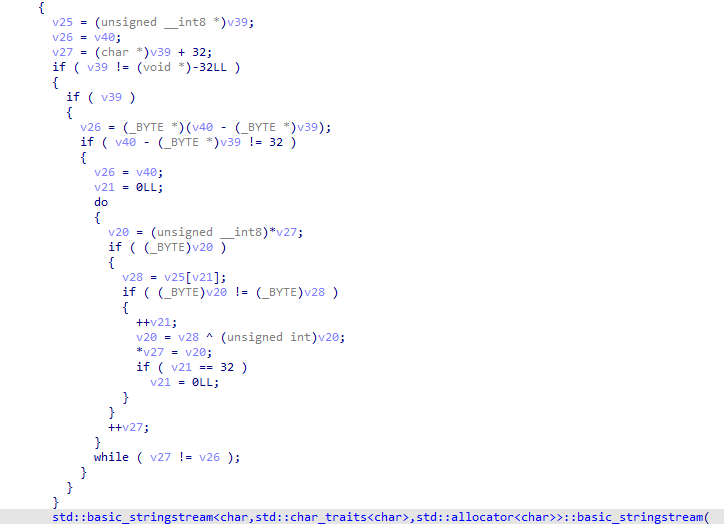

*This loop conveniently leads into a string constructor, which is a pretty big hint that this is the final stage of decoding before our config string is constructed.*

We can follow the outputs of our uncompress() function and mark up our variables to get to something like the following:
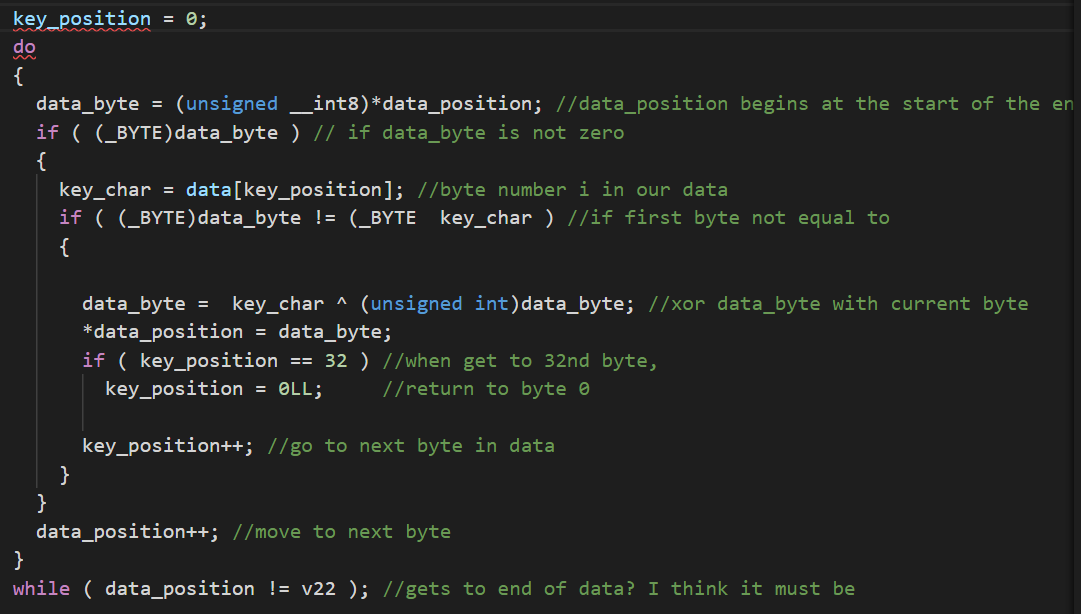

### Recreating our algorithm
We can see that the algorithm functions similar to something called a rolling xor key encoding, or "multibyte XOR key" encoding, which is where byte 1 is XORd with the first byte of the key, byte 2 with the 2nd, byte 3 with the 3rd, and so on. This repeats until we get to the end of our key (_see if key_position == 32_) and then we loop back to the first byte of our key again (so the 33rd byte of the data is XORd with the 1st byte of the key)

However, two if statements throw in some additional complexities:
- If the encoded config byte is zero, do not encode it and move on
- If the encoded config byte is the same as whichever byte of the key we are on, do not encode it and move on

This is what was causing our problems when trying to perform a simple XOR, and is the reason why our key only worked up until a certain point.

### We recreated the algorithm in python with some slight reordering and modification
When recreating the exact steps of the algorithm from our decompiler, we see that the output is a clean json file, with all of our blackmatter config values

In [130]:
data = bytearray(decompressed)
key = bytearray("mfBFDBtWeKgGajpP3hjuuK1tedsCdMl9", encoding="utf-8")

data_position = 32
key_position = 0

#print(data[0:32].decode("utf-8","ignore"))

output = bytearray()

while data_position != len(data):
    #print("Data position at " + str(data_position) + " and key position at " + str(key_position))
    #print(str(data[data_position]) + str(key[key_position]))
    if data[data_position] != 0:
        if data[data_position] != key[key_position]:
            data[data_position] = data[data_position] ^ key[key_position]
            key_position += 1
            if key_position == 32:
                key_position = 0
            
    data_position += 1 

print(data.decode("utf-8"))
            

mfBFDBtWeKgGajpP3hjuuK1tedsCdMl9{
    "rsa": "MIICIDANBgkqhkiG9w0BAQEFAAOCAg0AMIICCAKCAgEAx4XJRtX6r+W\/s6\/mRQmiN1xh4nwLSdOXNZO9ynfuH7iecuNoiwmBM4eBSS3Ncp\/Db7klQoh1xZ51U030++C7uHZBlZ8gEIKv0oYNDs7JadkEeMK8ndiU7HtiyJk0Qe7pjusseoyIVSwA7ID6hT94J\/w84c5VMiHNZdLybpHwL1rubqHjvge\/PnH4uAH3JeNU2sFh8STT1XAux148IyuszgWzJgvXd7mc3gpk1JVa\/sP9p0LhRkas1gOedJIw1iGF8OQbemvPalB\/JbbV+WLFKyko5i1dUGHKMEntFVBcRAlu12MP9tX5KVkMK7eNIRjPMZIFIHGSvdQR9XYceA6VY6hC1kbcGi5681vbtT335T9tPyy1Fjtx+LqYxGtp4B+8BnyTlOdi5Btj6bKi4IImO\/gHspDLRbMrmGEA5wgv1kOgcW\/gE1w8Tqfx28t\/bHbWQclF+QTSkGyoVre\/4Ar\/raCgPfa15kpCzG4UxBQCRRH+EazQ5WdsbbsNAtOfUvHyy5djtD9Im7IqT3qAU2AJnIjXTr75i0410K3yY2tNZwj2tQ4wJZ7RFjFxirdHq+0ZUobkoADUjbCOgUZ5Y9KFXlgsNR+rNakDczAiMQwkZhl0M1R7nbJ8sTCSOZiomT7UV+fkZRPjPNiLZcZTFdBkuT+Cm595n+QWHcer8HEvZ3UCAQM=",
    "remove-self": "true",
    "worker-concurrency": "0",
    "disk": {
        "enable": "true",
        "type": "single",
        "dark-size": "512",
        "white-size": "30720",
        "min-size": "0",